### Ridge, Lasso, and ElasticNet Regression From Scratch

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.datasets import make_regression
from sklearn.datasets import fetch_california_housing
from datetime import datetime
np.random.seed(42)
random.seed(42)

In [2]:
def TrainTestSplit(data, target, test_size):
    
    n = len(data)
    k = int(test_size*n)
    idx = list(np.arange(n))
    test_idx = np.array(random.sample(idx, k))
    
    train = data.iloc[~test_idx,:]
    test = data.iloc[test_idx,:]
    
    X_train = train.drop(target, axis=1).to_numpy()
    X_test = test.drop(target, axis=1).to_numpy()
    
    y_train = train[target].to_numpy()
    y_train.shape = (y_train.shape[0],1)

    y_test = test[target].to_numpy()
    y_test.shape = (y_test.shape[0],1)
    
    return X_train, X_test, y_train, y_test

In [3]:
def add_ones(X):
    return np.concatenate((np.ones(shape=(X.shape[0],1)), X), axis=1)

In [4]:
def predict(X, b):
    return X @ b

In [5]:
def RMSE(y, y_hat):
    d = y - y_hat
    return float(np.sqrt((d.T @ d) / y.shape[0]))

In [6]:
def fit_regressor(X, y, b, lr, epochs, l1_penalty=0, l2_penalty=0):
    
    b_log, errors = [], []
    n = X.shape[0]
    
    for epoch in range(epochs):

        y_hat = predict(X, b)
        
        b_l1 = np.sign(b)
        b_l2 = np.concatenate((np.array([[0]]), b[1:]), axis=0)
        # According to the need the following line calculates the gredient considering
        # the l1, l2, and l1-l2 penalties for Lasso, Ridge and ElasticNet regressors, respectively.
        db = ( - ( 2 * X.T @ (y - y_hat) ) + (l1_penalty * b_l1) + ( 2 * l2_penalty * b_l2 ) )  / n
        b = b - lr*db
        
        error = RMSE(y, y_hat)

        b_log.append(b)
        errors.append(error) 
    
    return b_log, errors

In [7]:
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv', header=None)
data.columns = ['x'+str(i) for i in range(1,14)] + ['y']

X_train, X_test, y_train, y_test = TrainTestSplit(data, target='y', test_size=.2)
X_train = add_ones(X_train)
X_test = add_ones(X_test)

b_init = np.random.randn(X_train.shape[1]).reshape(X_train.shape[1],1)

In [8]:
b_log, errors = fit_regressor(X_train, y_train, b_init, lr=1e-6, epochs=500, l1_penalty=.5, l2_penalty=1.0)

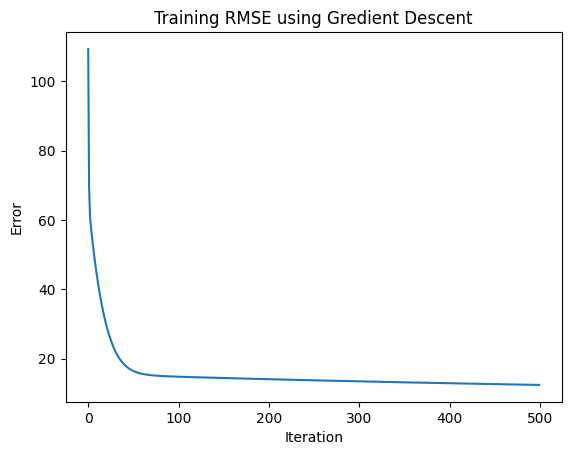

In [9]:
plt.plot(errors)
plt.title('Training RMSE using Gredient Descent')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.show()

In [10]:
y_hat = predict(X_test, b=b_log[-1])
rmse = RMSE(y_test, y_hat)
print ('Training Mean Squared Errorusing Gredient Descent:\t %.2f'%errors[-1])
print ('Test Mean Squared Errorusing Gredient Descent:\t\t %.2f'%rmse)

Training Mean Squared Errorusing Gredient Descent:	 12.45
Test Mean Squared Errorusing Gredient Descent:		 16.32
